<a href="https://colab.research.google.com/github/SELF-msselve/UTN-DataEngineering/blob/main/CEL_Data_Eng_Almacenamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Almacenamiento de datos**
Como Data Engineers, debemos almacenar datos
- que obtenemos durante la extracción
- y los que generamos durante el procesamiento y transformación

con el propósito hacerlos **accesibles para las personas interesadas**

La siguiente imágen representa la importancia de almacenar los datos en un sistema central para permitir la disponibilidad de los datos.
Ese sistema puede ser un Data Lake, un Data Warehouse o, incluso, una combinación de ambos

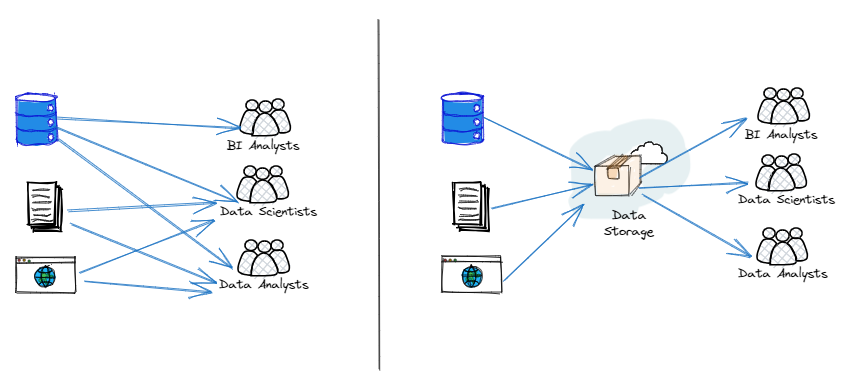

## **Data Lake y Data Warehouse**
Existen diferentes aspectos para diferenciar Data Lake (DL) y Data Warehouse (DW).

En DL:
- Los datos se gestionan como archivos, por lo general **basados en columnas**
- Se trabajan con **Object Storage**. Por ejemplo: minio, Amazon S3, Azure Data Lake Storage, etc.

En DW:
- Los datos se gestionan como **tablas**, ya que se trata de base de datos SQL.
- Se trabaja con **bases de datos OLAP**, como Google BigQuery, Amazon Redshift, Apache Hive, Apache Pinot, etc.

## Archivos columnares
En el contexto de un Data Lake, es muy probable que trabajemos con formatos de archivos columnares.

Son archivos optimizados para la analítica de datos debido a que comprimen los datos, reducen el uso de espacio en disco y organizan su contenido de forma que aceleran los procesos de analítica.

En este [artículo](https://dzone.com/articles/how-to-be-a-hero-with-powerful-parquet-google-and) podemos ver las ventajas y diferentes del formato columnar Parquet frente a formatos orientados a filas como CSV.

In [ ]:
!pip install -q fastparquet

El formato parquet es libre y open source, por lo cual es posible utilizarlo desde diferentes tecnologías y herramientas. Por ejemplo, la librería Pandas y el motor Apache Spark son capaces de leer y guardar archivos Parquet tanto en sistemas locales como en sistemas en nube.

## **Hands-on con Parquet**

In [ ]:
import pandas as pd
import os

In [ ]:
data_url = "https://data.montgomerycountymd.gov/api/views/v76h-r7br/rows.csv"

In [ ]:
df_retail_csv = pd.read_csv(data_url)

In [ ]:
os.makedirs('datalake/bronze/retail/sales', exist_ok=True)

In [ ]:
df_retail_csv.to_parquet(
    "datalake/bronze/retail/sales/data.parquet",
    engine="fastparquet"
    )

In [ ]:
df_retail = pd.read_parquet(
    "datalake/bronze/retail/sales/data.parquet",
    engine="fastparquet"
)
print(f"La cantidad de registros es: {df_retail.shape[0]}")

La cantidad de registros es: 307645


In [ ]:
!rm -rf datalake/bronze/retail/sales_v2

In [ ]:
df_retail_csv.to_parquet(
    "datalake/bronze/retail/sales_v2",
    engine="fastparquet",
    partition_cols=["ITEM TYPE"]
    )

In [ ]:
df_retail_v2 = pd.read_parquet(
    "datalake/bronze/retail/sales_v2",
    engine="fastparquet",
    filters=[("ITEM TYPE", "==", "BEER")]
    )
df_retail_v2.head(3)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,ITEM TYPE
0,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,0.0,0.0,1.0,BEER
1,2020,1,BROWN-FORMAN BEVERAGES WORLDWIDE,1008,JACK DANIELS COUNTRY COCKTAIL SOUTHERN PEACH -...,0.0,0.0,2.0,BEER
2,2020,1,ALLAGASH BREWING COMPANY,10271,ALLAGASH SAISON 6/4 NR 12.0Z,0.0,0.0,9.0,BEER


In [ ]:
!rm -rf datalake/bronze/retail/sales_v3

In [ ]:
df_retail_csv.to_parquet(
    "datalake/bronze/retail/sales_v3",
    engine="fastparquet",
    partition_cols=["YEAR", "MONTH"]
    )

In [ ]:
df_retail_v3 = pd.read_parquet(
    "datalake/bronze/retail/sales_v2",
    engine="fastparquet",
    filters=[("YEAR", ">", 2019)]
    )
df_retail_v3.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,ITEM TYPE
0,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,0.00,0.0,1.0,BEER
1,2020,1,BROWN-FORMAN BEVERAGES WORLDWIDE,1008,JACK DANIELS COUNTRY COCKTAIL SOUTHERN PEACH -...,0.00,0.0,2.0,BEER
2,2020,1,ALLAGASH BREWING COMPANY,10271,ALLAGASH SAISON 6/4 NR 12.0Z,0.00,0.0,9.0,BEER
3,2020,1,YOUNG WON TRADING INC,10345,KLOUD - 500/12 NR,2.00,2.0,0.0,BEER
4,2020,1,YOUNG WON TRADING INC,10346,KLOUD - 330/24 NR,2.75,2.0,7.0,BEER


In [ ]:
data = {
    "apiVersion": "1.0",
    "updatedAt": "2021-01-01T00:00:00Z",
    "products": [
        {
            "id": 1,
            "name": "iphone 14 pro max",
            "features": {
                "color": "black",
                "storage": 256,
                "camera": 4
            }
        },
        {
            "id": 2,
            "name": "macbook pro 2021",
            "features": {
                "color": "white",
                "storage": 512,
                "ram": 16,
                "os": "macOS"
            }
        },
        {
            "id": 3,
            "name": "air fryer atma",
            "features": {
                "color": "black",
                "power": 1500,
                "capacity": 5
            }
        }
    ]
}

In [ ]:
# opcion 1
pd.json_normalize(
    data,
    record_path="products", # Atributo que contiene lista de objetos
    meta=["apiVersion", "updatedAt"] # Opcional
    ).head()

,id,name,features.color,features.storage,features.camera,features.ram,features.os,features.power,features.capacity,apiVersion,updatedAt
0,1,iphone 14 pro max,black,256.0,4.0,NaN,NaN,NaN,NaN,1.0,2021-01-01T00:00:00Z
1,2,macbook pro 2021,white,512.0,NaN,16.0,macOS,NaN,NaN,1.0,2021-01-01T00:00:00Z
2,3,air fryer atma,black,NaN,NaN,NaN,NaN,1500.0,5.0,1.0,2021-01-01T00:00:00Z


In [ ]:
# opcion 2
pd.json_normalize(
    data["products"] # Acceder directamente a la lista de objetos
    ).head()

,id,name,features.color,features.storage,features.camera,features.ram,features.os,features.power,features.capacity
0,1,iphone 14 pro max,black,256.0,4.0,NaN,NaN,NaN,NaN
1,2,macbook pro 2021,white,512.0,NaN,16.0,macOS,NaN,NaN
2,3,air fryer atma,black,NaN,NaN,NaN,NaN,1500.0,5.0


In [ ]:
# Opcion 3

pd.json_normalize(data)

# lo guardamos en parquet y luego vemos tratarlo

,apiVersion,updatedAt,products
0,1.0,2021-01-01T00:00:00Z,"[{'id': 1, 'name': 'iphone 14 pro max', 'featu..."
